In [3]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats

# Global visualization settings (industry standard)
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["figure.autolayout"] = True

In [2]:
DATA_PATH = "../data/Invistico_Airline.csv"

df = pd.read_csv(DATA_PATH)

In [4]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
df.shape

(129880, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [10]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Arrival Delay in Minutes    393
dtype: int64

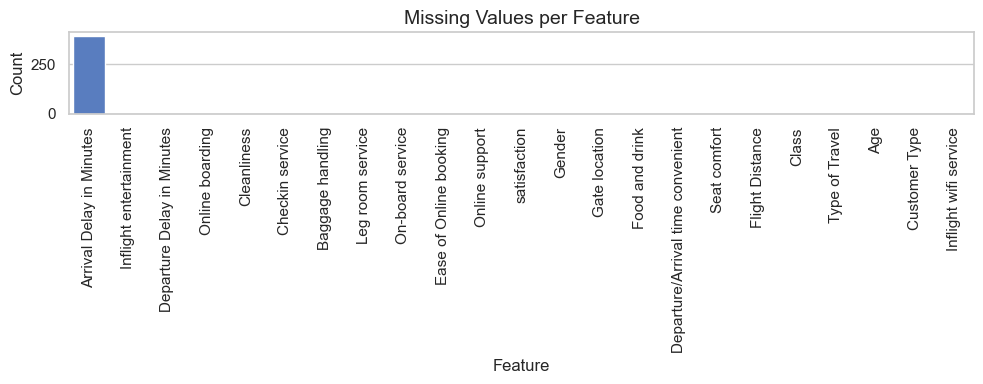

In [11]:
plt.figure(figsize=(10, 4))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=90)
plt.title("Missing Values per Feature")
plt.ylabel("Count")
plt.xlabel("Feature")
plt.show()

In [12]:
df["satisfaction"].value_counts()

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [13]:
df["satisfaction"].value_counts(normalize=True) * 100

satisfaction
satisfied       54.73283
dissatisfied    45.26717
Name: proportion, dtype: float64

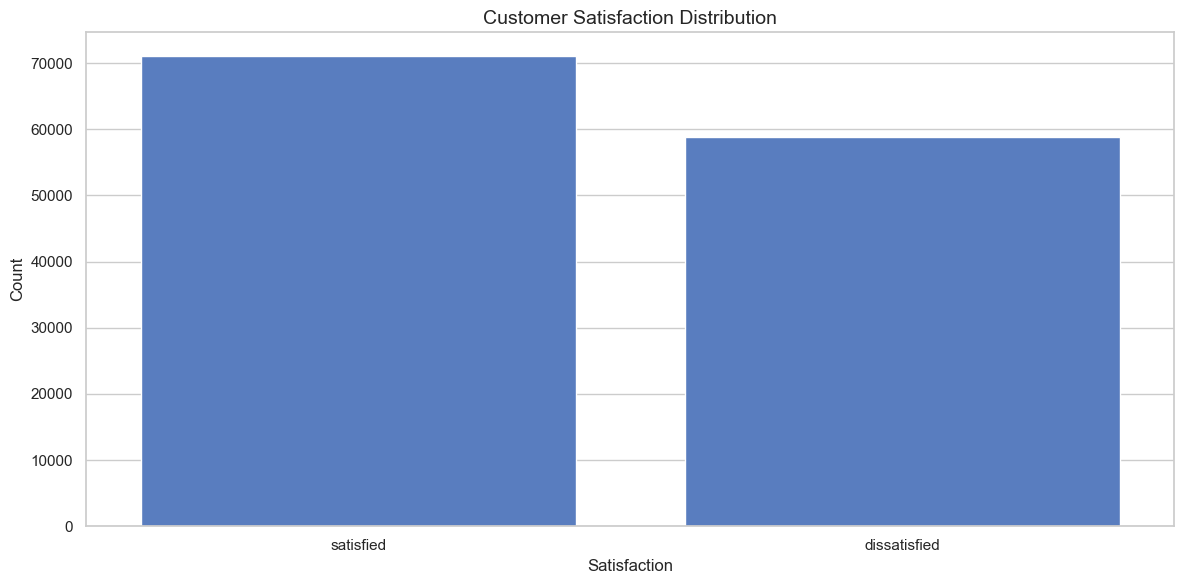

In [14]:
sns.countplot(
    data=df,
    x="satisfaction",
    order=df["satisfaction"].value_counts().index
)
plt.title("Customer Satisfaction Distribution")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.show()

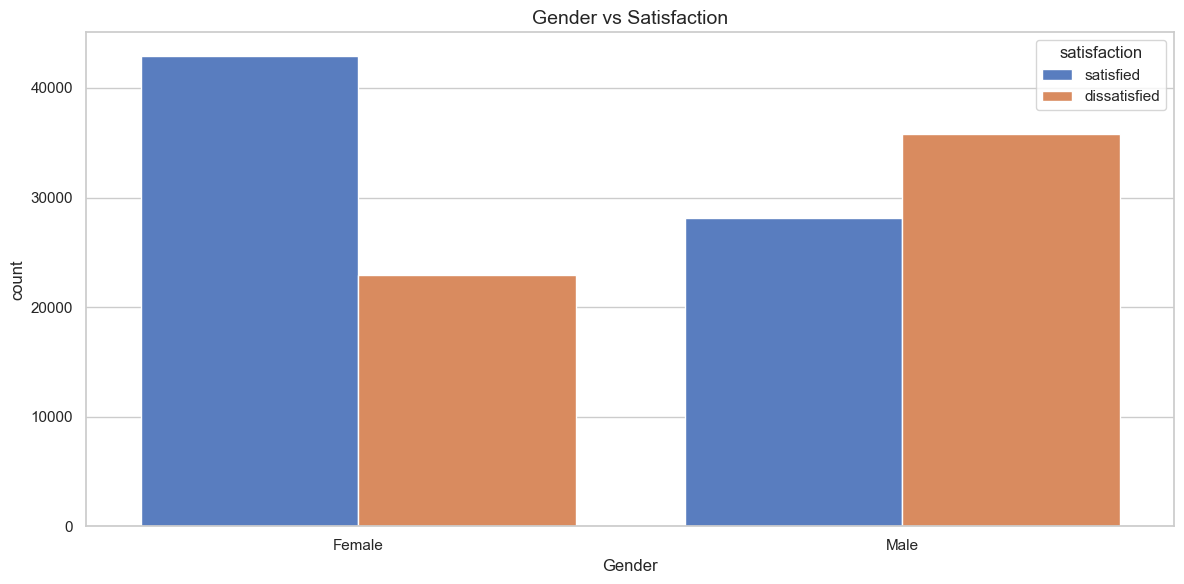

In [15]:
sns.countplot(
    data=df,
    x="Gender",
    hue="satisfaction"
)
plt.title("Gender vs Satisfaction")
plt.show()

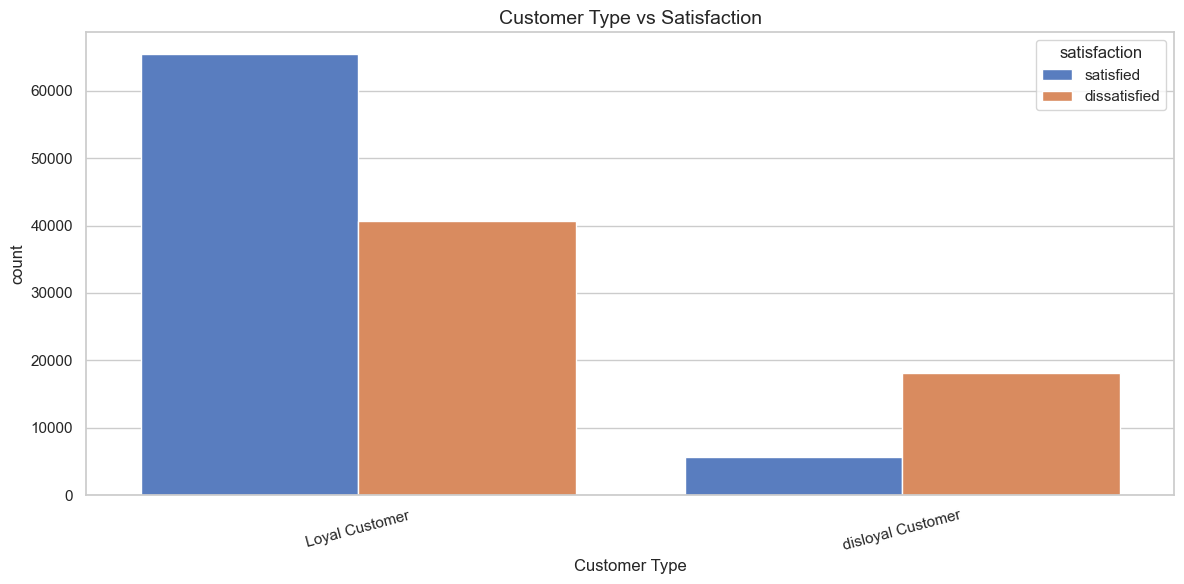

In [16]:
sns.countplot(
    data=df,
    x="Customer Type",
    hue="satisfaction"
)
plt.title("Customer Type vs Satisfaction")
plt.xticks(rotation=15)
plt.show()

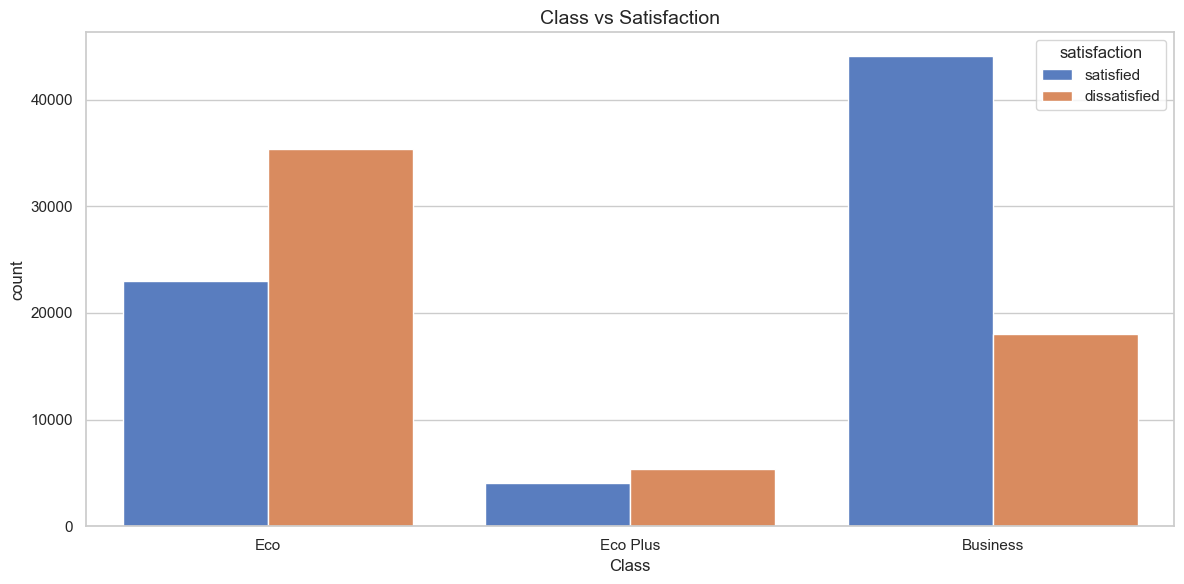

In [17]:
sns.countplot(
    data=df,
    x="Class",
    hue="satisfaction",
    order=["Eco", "Eco Plus", "Business"]
)
plt.title("Class vs Satisfaction")
plt.show()

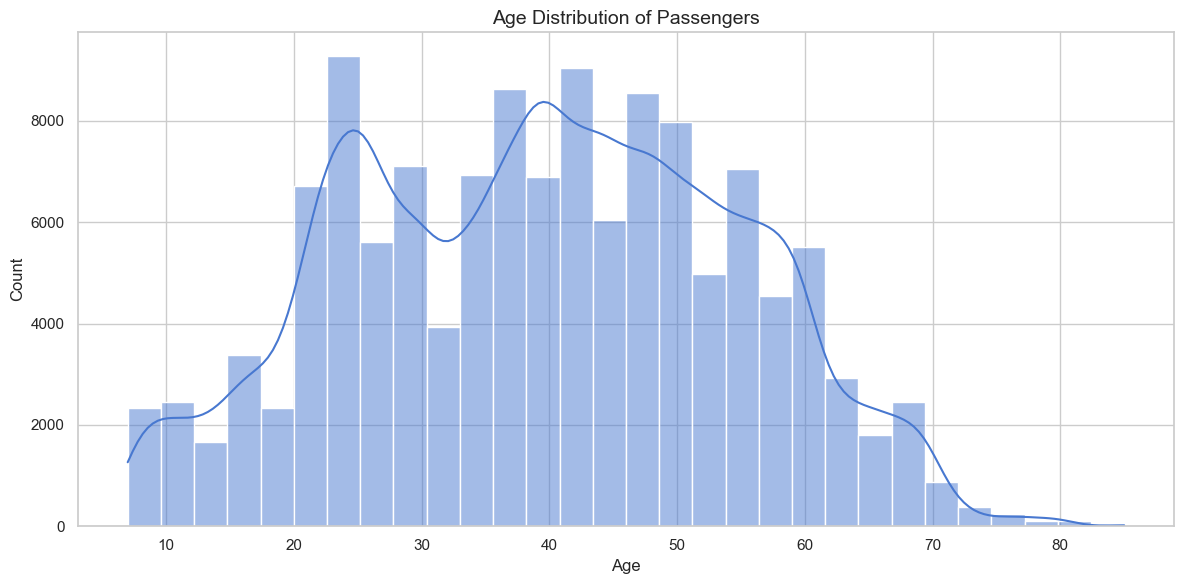

In [18]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.show()

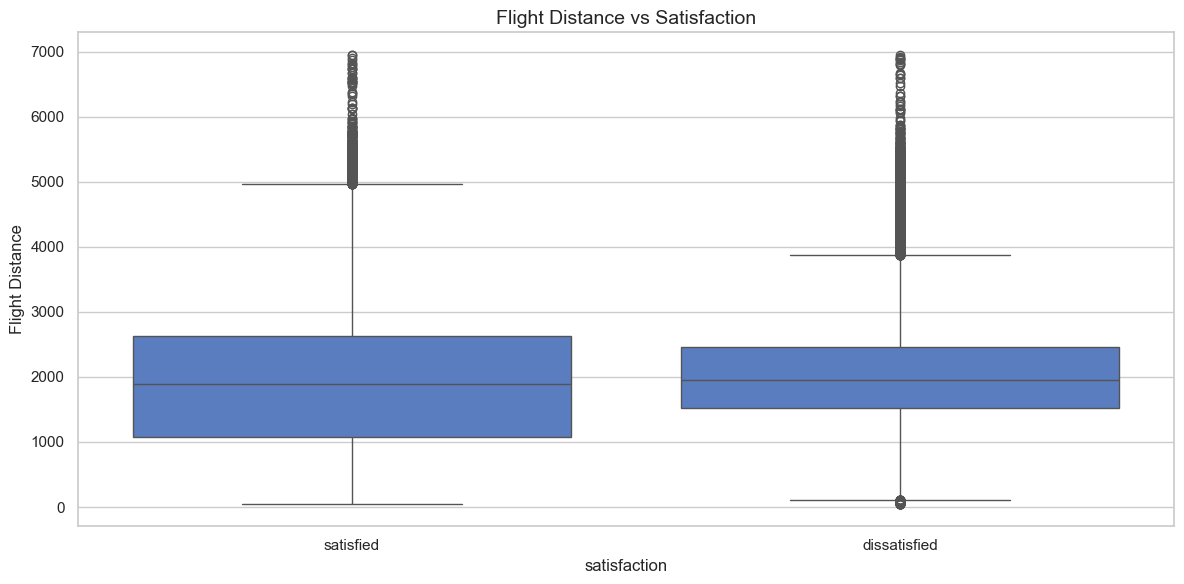

In [19]:
sns.boxplot(
    data=df,
    x="satisfaction",
    y="Flight Distance"
)
plt.title("Flight Distance vs Satisfaction")
plt.show()

In [20]:
service_features = [
    "Seat comfort",
    "Food and drink",
    "Inflight wifi service",
    "Inflight entertainment",
    "Online support",
    "Ease of Online booking",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Cleanliness",
    "Online boarding"
]

In [21]:
service_means = df.groupby("satisfaction")[service_features].mean().T
service_means

satisfaction,dissatisfied,satisfied
Seat comfort,2.467335,3.145653
Food and drink,2.660419,3.010438
Inflight wifi service,2.919854,3.521460
Inflight entertainment,2.608644,4.024308
Online support,2.959213,3.983260
Ease of Online booking,2.852261,3.984751
On-board service,2.973126,3.871946
Leg room service,3.052625,3.844247
Baggage handling,3.364601,3.969488
Checkin service,2.971850,3.645955


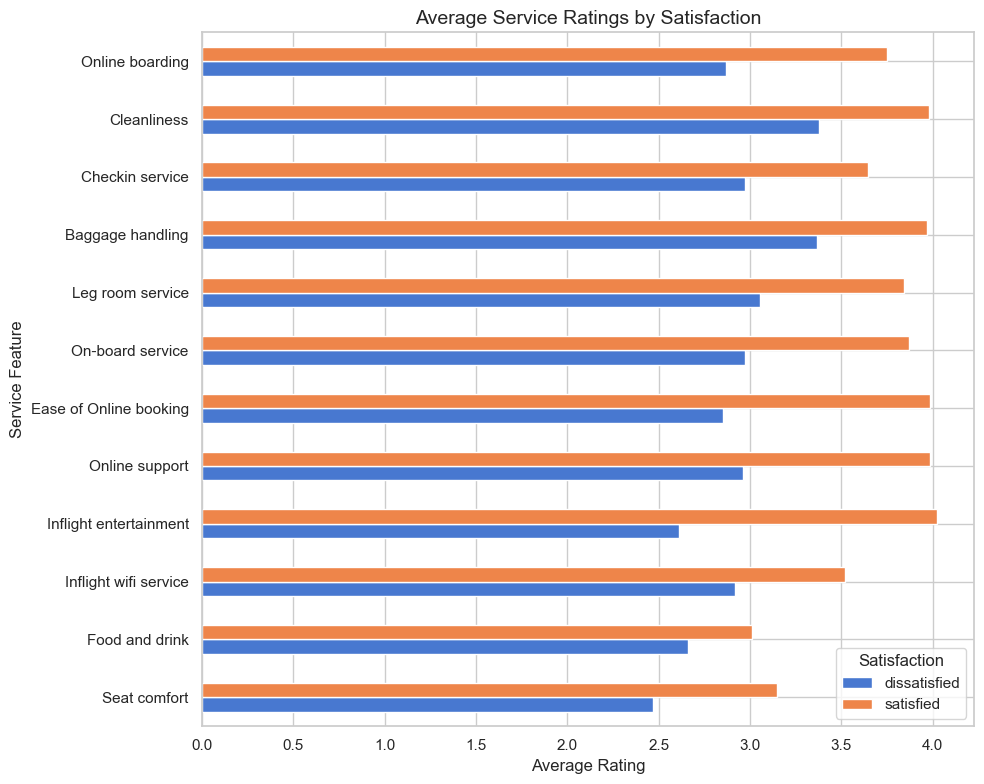

In [22]:
service_means.plot(kind="barh", figsize=(10, 8))
plt.title("Average Service Ratings by Satisfaction")
plt.xlabel("Average Rating")
plt.ylabel("Service Feature")
plt.legend(title="Satisfaction")
plt.show()

In [23]:
df["Departure Delay in Minutes"].fillna(0, inplace=True)
df["Arrival Delay in Minutes"].fillna(0, inplace=True)

/var/folders/lx/y473dmd16l3c0kkr0h14c2x40000gn/T/ipykernel_10163/3807642205.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Departure Delay in Minutes"].fillna(0, inplace=True)
/var/folders/lx/y473dmd16l3c0kkr0h14c2x40000gn/T/ipykernel_10163/3807642205.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

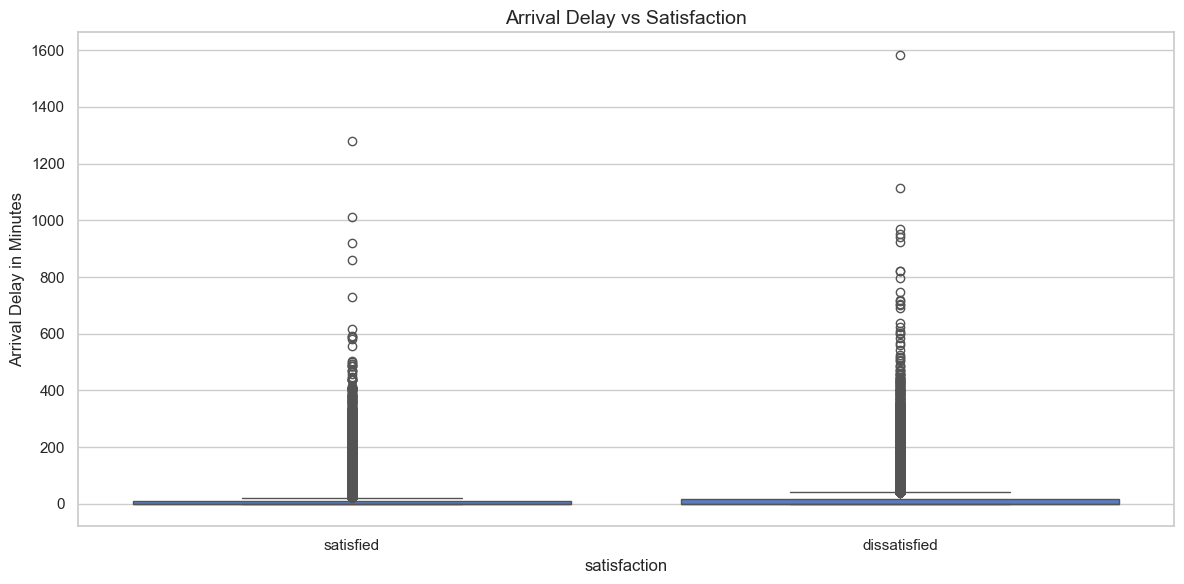

In [24]:
sns.boxplot(
    data=df,
    x="satisfaction",
    y="Arrival Delay in Minutes"
)
plt.title("Arrival Delay vs Satisfaction")
plt.show()

In [25]:
sat_seat = df[df["satisfaction"] == "satisfied"]["Seat comfort"]
dis_seat = df[df["satisfaction"] == "dissatisfied"]["Seat comfort"]

u_stat, p_val = stats.mannwhitneyu(sat_seat, dis_seat)
u_stat, p_val

(np.float64(2708953270.5), np.float64(0.0))

In [26]:
print("Statistically significant" if p_val < 0.05 else "Not statistically significant")

Statistically significant


In [27]:
sat_delay = df[df["satisfaction"] == "satisfied"]["Arrival Delay in Minutes"]
dis_delay = df[df["satisfaction"] == "dissatisfied"]["Arrival Delay in Minutes"]

stats.ttest_ind(
    sat_delay,
    dis_delay,
    equal_var=False,
    nan_policy="omit"
)

TtestResult(statistic=np.float64(-28.355846158530685), pvalue=np.float64(3.175814362296054e-176), df=np.float64(107522.01420261113))

In [29]:
contingency = pd.crosstab(df["Class"], df["satisfaction"])
chi2, p, _, _ = stats.chi2_contingency(contingency)
chi2, p

(np.float64(12671.683816044482), np.float64(0.0))

In [30]:
df_corr = df.copy()
df_corr["satisfaction"] = df_corr["satisfaction"].map(
    {"dissatisfied": 0, "satisfied": 1}
)

In [31]:
corr = df_corr.corr(numeric_only=True)

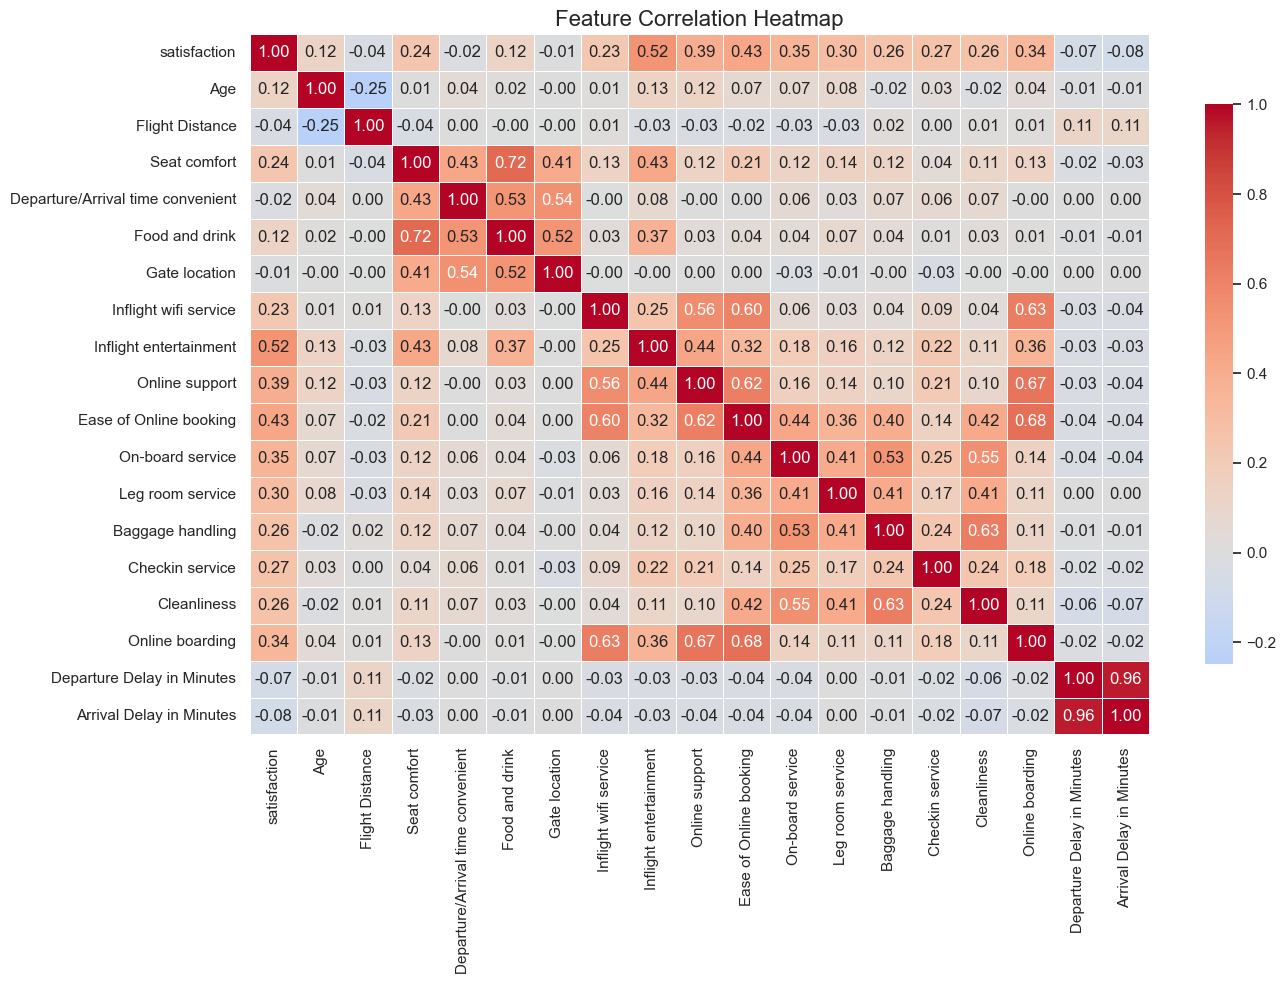

In [34]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,              # 🔹 show numbers inside cells
    fmt=".2f",               # 🔹 round to 2 decimals
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8} # 🔹 cleaner color bar
)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

In [33]:
summary = {
    "Top Satisfaction Drivers": [
        "Online boarding",
        "Seat comfort",
        "Inflight entertainment",
        "Cleanliness"
    ],
    "Major Risk Factors": [
        "Arrival delays",
        "Poor onboard service",
        "Low legroom rating"
    ],
    "Business Actions": [
        "Improve economy class comfort",
        "Reduce delays",
        "Enhance digital boarding experience"
    ]
}

pd.DataFrame(dict([(k, pd.Series(v)) for k, v in summary.items()]))

,Top Satisfaction Drivers,Major Risk Factors,Business Actions
0,Online boarding,Arrival delays,Improve economy class comfort
1,Seat comfort,Poor onboard service,Reduce delays
2,Inflight entertainment,Low legroom rating,Enhance digital boarding experience
3,Cleanliness,NaN,NaN
